Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 tasks      | elapsed:    4.2s
[Parallel(n_jobs=5)]: Done 2175 tasks      | elapsed:    9.5s
[Parallel(n_jobs=5)]: Done 5184 out of 5184 | elapsed:   17.3s finished


Best estimators:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=6, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
DT with default params accuracy:  0.7075582107843138

 --------------------
DT with tuned hyper paramaters:  0.733422181372549


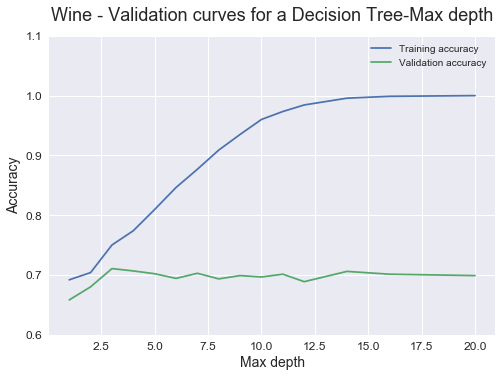

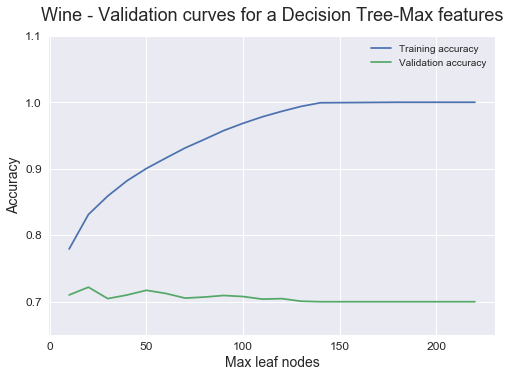

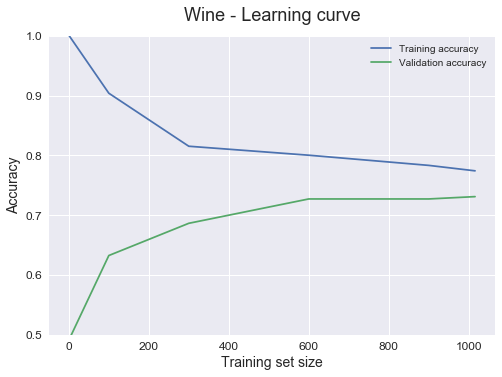

In [1]:
###########DT##################
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#plot tree(hide for now)
#tree.plot_tree(clf);

#save tree as pdf
#wine_data = tree.export_graphviz(clf, out_file=None)
#graph = graphviz.Source(wine_data)
#graph.render("wine")

#grid search to find best paramteres
params = {'max_leaf_nodes': [14,15,16,17]
          , 'min_samples_split': [1, 2,3]
          , 'max_depth' : [1,2,3,4,5,6]
          , 'criterion' : ['gini', 'entropy']
          , 'max_features' : [5,6,7]
          , 'min_samples_leaf': [2, 3]
          , 'min_impurity_decrease': [0.0, 0.1]
        }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42)
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=3
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);

#print best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("DT with default params accuracy: ", cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, scoring='accuracy').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("DT with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())


#plot validation curve
#1. tree depth

tree_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12,14,16,20]
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(
                       random_state=42,
                       splitter='best'),
                                              X_train,
                                              y_train,
                                              param_name = "max_depth",
                                              param_range = tree_depth_range,
                                             cv=3)

plt.style.use('seaborn')
plt.plot(tree_depth_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(tree_depth_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Max depth', fontsize = 14)
plt.title('Wine - Validation curves for a Decision Tree-Max depth', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.6,1.1)
plt.show()

#2. Max features

features_range = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,180,220]
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(
                       random_state=42,
                       splitter='best'),
                                              X_train,
                                              y_train,
                                              param_name = "max_leaf_nodes",
                                              param_range = features_range,
                                             cv=3)

plt.style.use('seaborn')
plt.plot(features_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(features_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Max leaf nodes', fontsize = 14)
plt.title('Wine - Validation curves for a Decision Tree-Max features', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.65,1.1)
plt.show()



#learning curve

train_sizes = [1, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy',
               shuffle = True)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curve', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.5,1)
plt.show()

In [2]:
#based on VC curve tuning
dt =DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=6, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

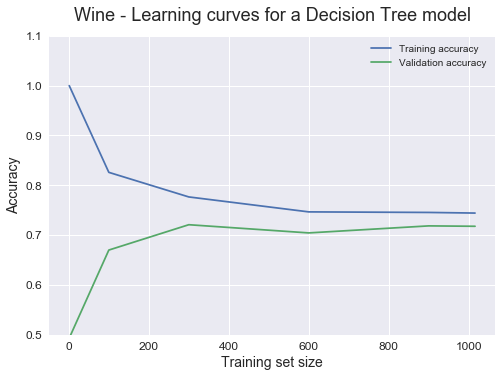

In [3]:
#learning curve

train_sizes = [1, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = dt,#grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy',
               shuffle = True,
               random_state = 42)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a Decision Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.5,1.1)
plt.show()

In [4]:


#model with default features
print("DT with default params accuracy: ", cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, scoring='accuracy').mean())

#model with perf tuned hyperparameters
print("DT with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())

#model with perf tuned hyperparameters
print("DT with tuned LC paramaters: ", cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy').mean())


DT with default params accuracy:  0.7075582107843138
DT with tuned hyper paramaters:  0.733422181372549
DT with tuned LC paramaters:  0.7177910539215686


Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 2550 tasks      | elapsed:    7.6s
[Parallel(n_jobs=5)]: Done 6550 tasks      | elapsed:   18.4s
[Parallel(n_jobs=5)]: Done 12150 tasks      | elapsed:   34.9s
[Parallel(n_jobs=5)]: Done 19350 tasks      | elapsed:   56.4s
[Parallel(n_jobs=5)]: Done 28000 out of 28000 | elapsed:  1.3min finished


Best estimators:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=8, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
DT with default params accuracy:  0.7447316875326063

 --------------------
DT with tuned hyper paramaters:  0.7799522085069673


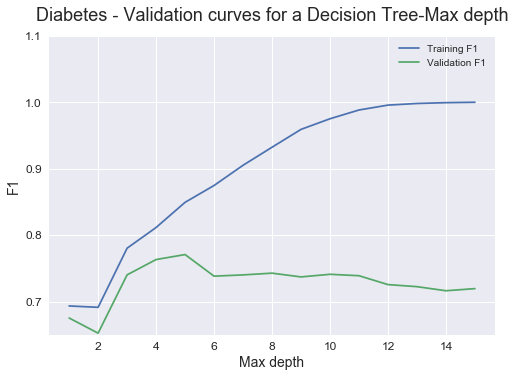

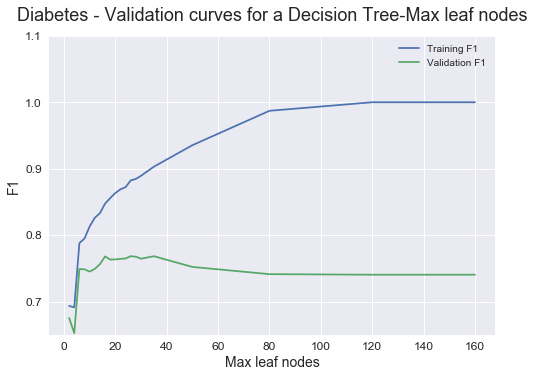

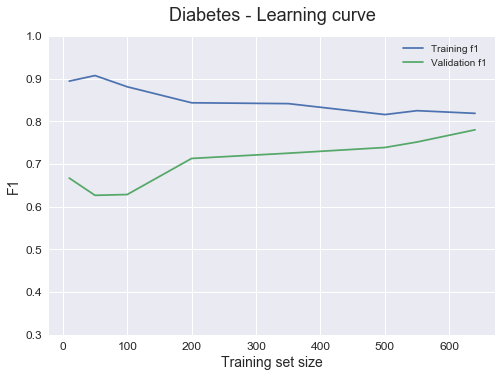

In [5]:
#diabetes
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

oversample = BorderlineSMOTE(random_state=42)
X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#plot tree(hide for now)
#tree.plot_tree(clf);

#save tree as pdf
diabetes_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(diabetes_data)
graph.render("diabetes")


#grid search to find best paramteres
params = {'max_leaf_nodes': [11,12, 13, 14,15]
          , 'min_samples_split': [1, 2]
          , 'max_depth' : [3,4,5,6]
          , 'criterion' : ['gini', 'entropy']
          , 'max_features' : [4,5,6,7,8]
          , 'min_samples_leaf': [3, 4, 6, 8 , 10, 12,15]
          , 'min_impurity_decrease': [0.0, 0.1]
        }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42)
                              , params
                              , scoring = "f1"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);

#print best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("DT with default params accuracy: ", cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("DT with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())

#plot validation curve
#1. tree depth

tree_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(

                       random_state=42,
                       splitter='best'),
                                              X_train,
                                              y_train,
                                              param_name = "max_depth",
                                              param_range = tree_depth_range,
                                              scoring='f1',
                                             cv=3)

plt.style.use('seaborn')
plt.plot(tree_depth_range, train_scores.mean(axis=1), label = 'Training F1')
plt.plot(tree_depth_range, valid_scores.mean(axis=1), label = 'Validation F1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Max depth', fontsize = 14)
plt.title('Diabetes - Validation curves for a Decision Tree-Max depth', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.65,1.1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()


#2. max_leaf_nodes

features_range = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,35,50,80,120,160]
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(

                       random_state=42,
                       splitter='best'),
                                              X_train,
                                              y_train,
                                              param_name = "max_leaf_nodes",
                                              param_range = features_range,
                                              scoring='f1',
                                             cv=3)

plt.style.use('seaborn')
plt.plot(features_range, train_scores.mean(axis=1), label = 'Training F1')
plt.plot(features_range, valid_scores.mean(axis=1), label = 'Validation F1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Max leaf nodes', fontsize = 14)
plt.title('Diabetes - Validation curves for a Decision Tree-Max leaf nodes', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.65,1.1)
plt.show()


#learning curve

train_sizes = [10, 50, 100, 200, 350, 500,550,640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               random_state=42,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curve', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.3,1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [6]:
dt2 =DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

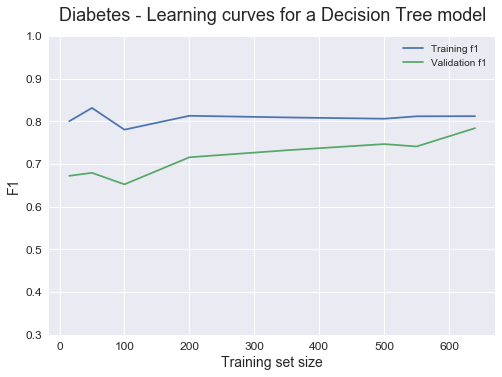

In [7]:
#learning curve based on VC

train_sizes = [15, 50, 100, 200, 350, 500,550,640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = dt2,#grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               random_state=42,
               #shuffle = True,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a Decision Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylim(0.3,1)
plt.show()

In [8]:
#model with default features
print("DT with default params accuracy: ", cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("DT with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())

#model with LC tuned hyperparameters
print("DT with LC hyper paramaters: ", cross_val_score(dt2, X_train, y_train, cv=5, scoring='f1').mean())

DT with default params accuracy:  0.7447316875326063

 --------------------
DT with tuned hyper paramaters:  0.7799522085069673
DT with LC hyper paramaters:  0.7838495011812996
